### Libraries

In [54]:
import glob
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import texthero as hero
from texthero import preprocessing
sb.set() # set the default Seaborn style for graphics
from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.dates as mdates

### Chunking CSV to upload onto GitHub

import pandas as pd

chunk_size = 55000
batch_no = 1

for chunk in pd.read_csv('221100_DayZ.csv', chunksize=chunk_size):
    #chunk.to_csv('221100_DayZ' + str(batch_no) + '.csv', index=False)
    #batch_no +=1

### Dataset

In [2]:
steamData = pd.read_csv('steam_data/steam.csv')
steamSupportInfo = pd.read_csv('steam_data/steam_support_info.csv')
steamChart = pd.read_csv('steam_data/steamCharts.csv')
steamSpyTagData = pd.read_csv('steam_data/steamspy_tag_data.csv')
steamGames = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_games/steam_games*.csv"))))
steamMediaData = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_media_data/steam_media_data*.csv"))))
steamRequirements = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_requirements/steam_requirements*.csv"))))
steamDescription = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_description/steam_description*.csv"))))

#game reviews
steam_HalfOfTheGameReviews = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_reviews/steam_review_*.csv"))))
files = glob.glob("steam_data/steam_reviews" + '**/**' + "/*.csv")
steamReviews_fromFolder = pd.concat([pd.read_csv(f) for f in files ])
steamReviewsDF = [steam_HalfOfTheGameReviews, steamReviews_fromFolder]
steamCombinedReviews = pd.concat(steamReviewsDF)

C:\Users\Pyae Pyae\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Pyae Pyae\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (1,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Pyae Pyae\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\Pyae Pyae\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


### Cleaning the Dataset

In [3]:
#rename for easier identification
steamGames = steamGames.rename(columns={"name": "title"})

#create a custom cleaning pipeline
custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_whitespace]

steamCombinedReviews['title'] = hero.clean(steamCombinedReviews['title'], pipeline = custom_pipeline)
steamGames['title'] = hero.clean(steamGames['title'], pipeline = custom_pipeline)

##### Getting title, genre and release date

In [4]:
#getting title and genre from steamGames df
steamGames_Title_Genre = steamGames[['title', 'genre', 'release_date']]

#getting title and review from steamCombinedReviews df
steamCombinedReviews_Title_Reviews = steamCombinedReviews[['title', 'review']]

##### matching title in steamGames with steamCombinedReview

In [5]:
matchTitle = steamGames_Title_Genre.title.isin(steamCombinedReviews_Title_Reviews.title)
steamMatchTitle = steamGames_Title_Genre[matchTitle]

##### dropping duplicate values

In [6]:
steamUniqueTitle = steamMatchTitle.drop_duplicates(['title'])
steamUniqueTitle = steamUniqueTitle.reset_index(drop=True)

steamUniqueTitle
nan_value = float("NaN")
steamUniqueTitle.replace("", nan_value, inplace=True)
steamUniqueTitle.info()

steamUniqueTitle.dropna(subset = ["genre"], inplace=True)
steamUniqueTitle
steamUniqueTitle.to_excel("output.xlsx")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         130 non-null    object
 1   genre         130 non-null    object
 2   release_date  127 non-null    object
dtypes: object(3)
memory usage: 3.2+ KB


In [7]:
#steamUniqueTitle.to_excel("output.xlsx")

##### remove Early Acess, Massively Multiplayer and Free to Play values from genre column

In [8]:
steamUniqueTitle['genre'] = steamUniqueTitle.genre.str.replace(',Early Access?', '')
steamUniqueTitle['genre'] = steamUniqueTitle.genre.str.replace(',Massively Multiplayer?', '')
steamUniqueTitle['genre'] = steamUniqueTitle.genre.str.replace('Massively Multiplayer,?', '')
steamUniqueTitle['genre'] = steamUniqueTitle.genre.str.replace(',Free to Play?', '')
steamUniqueTitle['genre'] = steamUniqueTitle.genre.str.replace('Free to Play,?', '')

<ipython-input-8-1b6a5137f3ce>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  steamUniqueTitle['genre'] = steamUniqueTitle.genre.str.replace(',Early Access?', '')
<ipython-input-8-1b6a5137f3ce>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  steamUniqueTitle['genre'] = steamUniqueTitle.genre.str.replace(',Massively Multiplayer?', '')
<ipython-input-8-1b6a5137f3ce>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  steamUniqueTitle['genre'] = steamUniqueTitle.genre.str.replace('Massively Multiplayer,?', '')
<ipython-input-8-1b6a5137f3ce>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  steamUniqueTitle['genre'] = steamUniqueTitle.genre.str.replace(',Free to Play?', '')
<ipython-input-8-1b6a5137f3ce>:5: FutureWarning: The default value of regex will change from True to False in a future ver

##### remove Coming Soon values from release_date column

In [9]:
steamUniqueTitle['release_date'] = steamUniqueTitle.release_date.str.replace('Coming Soon' , '')

##### split genre into 6 columns

In [10]:
steamUniqueTitle[['genre1', 'genre2', 'genre3','genre4','genre5','genre6']] = steamUniqueTitle['genre'].str.split(',', expand=True)

##### dropping genre, title, and release date columns to get the total count of genre

In [11]:
steamGenreCount = steamUniqueTitle.drop(columns=['genre','title', 'release_date'])

##### reset index and rename the column

In [12]:
steamGenreGraph = steamGenreCount.stack().value_counts().reset_index()
steamGenreGraph.columns = ['genre','count']

##### graph to see which genre is most popular 

<AxesSubplot:xlabel='genre', ylabel='count'>

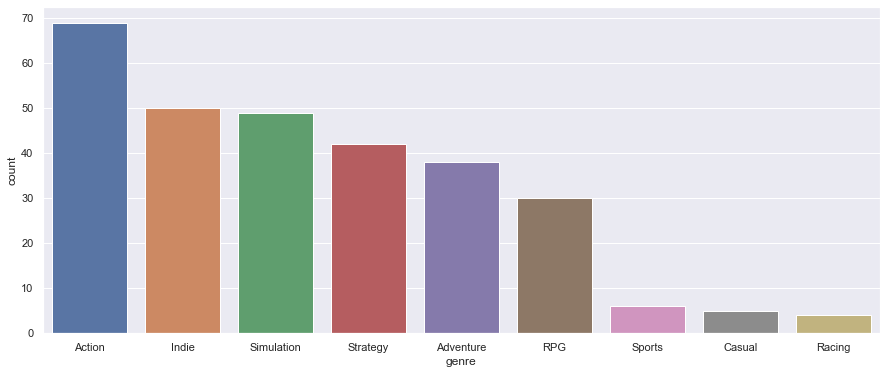

In [13]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sb.barplot(x="genre", y="count", data=steamGenreGraph, ax=ax)

we can see that most popular genres are action, indie and simulation

In [14]:
# storing first 3 letters of name as username
steamGenre_Date = steamUniqueTitle
steamGenre_Date['year'] = steamGenre_Date['release_date'].str.slice(-4)
steamGenre_Date = steamUniqueTitle.drop(columns=['title', 'genre1', 'genre2', 'genre3','genre4','genre5','genre6'])
#steamGenre_Date = steamUniqueTitle.drop(columns=['title','release_date'])
steamGenre_Date

,genre,release_date,year
0,"Action,Adventure","Dec 21, 2017",2017
1,"Action,Adventure,Strategy","Apr 24, 2018",2018
2,"Adventure,Indie","Jul 22, 2016",2016
3,Strategy,"Dec 12, 2017",2017
4,Action,"Nov 1, 2004",2004
...,...,...,...
126,"Action,Adventure,RPG","Dec 22, 2018",2018
127,Action,"Feb 14, 2019",2019
128,"Simulation,Strategy",Q4 2019,2019
129,Action,,


In [15]:
test =steamGenre_Date.loc[steamGenre_Date['genre'].str.contains("action", case=False)]
test

,genre,release_date,year
0,"Action,Adventure","Dec 21, 2017",2017
1,"Action,Adventure,Strategy","Apr 24, 2018",2018
4,Action,"Nov 1, 2004",2004
5,"Action,Adventure,RPG","Oct 9, 2017",2017
8,"Action,Simulation,Strategy","May 15, 2014",2014
...,...,...,...
121,"Action,Adventure","Sep 1, 2015",2015
123,Action,"Nov 1, 2000",2000
126,"Action,Adventure,RPG","Dec 22, 2018",2018
127,Action,"Feb 14, 2019",2019


In [16]:
#options = ['Action','Indie','Simulation']
#options = ['Action']
#test = steamGenre_Date.loc[steamGenre_Date['genre1'].isin(options) | steamGenre_Date['genre2'].isin(options) | steamGenre_Date['genre3'].isin(options)
                          # | steamGenre_Date['genre4'].isin(options) | steamGenre_Date['genre5'].isin(options) | steamGenre_Date['genre6'].isin(options)]


#test

In [17]:
test.dtypes

genre           object
release_date    object
year            object
dtype: object

In [18]:
test["year"] = pd.to_numeric(test["year"])
#test["year"] = test["year"].astype(str).astype(int)

<ipython-input-18-9f3bffe6c8a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["year"] = pd.to_numeric(test["year"])


In [19]:
test["year"] = test["year"].fillna(0.0).astype(int)

<ipython-input-19-bb7be34a852b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["year"] = test["year"].fillna(0.0).astype(int)


In [20]:
# Get names of indexes for which column Age has value 30
indexNames =test[ test['year'] == 0 ].index
# Delete these row indexes from dataFrame
test.drop(indexNames , inplace=True)


C:\Users\Pyae Pyae\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [21]:
test.to_excel("output.xlsx")

In [38]:
grouped = test.groupby("year").count()
grouped.index

Int64Index([2000, 2004, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
            2018, 2019],
           dtype='int64', name='year')

In [39]:
grouped.reset_index(inplace=True)
grouped

,year,genre,release_date
0,2000,1,1
1,2004,1,1
2,2009,1,1
3,2010,1,1
4,2011,2,2
5,2012,1,1
6,2013,3,3
7,2014,3,3
8,2015,9,9
9,2016,8,8


In [34]:
#grouped['year'] = pd.to_datetime(grouped['year'], format='%Y')

In [40]:
grouped = grouped.rename(columns={'genre': 'count'})  # old method  
grouped['count'] = grouped['count'].astype(int)
grouped

,year,count,release_date
0,2000,1,1
1,2004,1,1
2,2009,1,1
3,2010,1,1
4,2011,2,2
5,2012,1,1
6,2013,3,3
7,2014,3,3
8,2015,9,9
9,2016,8,8


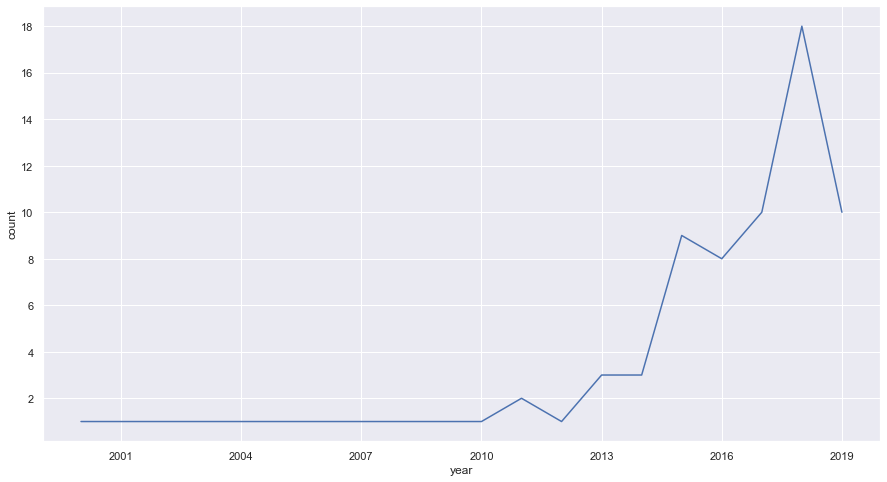

In [60]:
plt.figure(figsize=(15,8))
#plt.ylim(1, 20)

ax = sb.lineplot(x='year', y='count', data=grouped)
#ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
#ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
ya = ax.get_yaxis()
ya.set_major_locator(MaxNLocator(integer=True))

xa = ax.get_xaxis()
xa.set_major_locator(MaxNLocator(integer=True))

plt.show()